In [1]:
import os
import csv
import vaex
import matplotlib
import pylab as p
from numpy import *
import pandas as pd
from tqdm import tqdm
import subprocess as sub
from matplotlib.backends.backend_pdf import PdfPages

In [40]:
matplotlib.rcParams.update({'font.size': 14})

## Run Rockstar

In [ ]:
# ---------------------------
# The parameter for this run
# ---------------------------

fof_b = 0.2
fof_f = 0.4

min_seed   = 10
min_output = 10
unb_thres  = 0.7

input_file = '/input/input_6d_5'

# -------------
# My directory
# -------------

path = '/net/virgo01/data/users/virgini/rockstar/RC3/output/'

value_f = str(round(fof_f*100))
value_b = str(round(fof_b*100))
value_n = str(min_output)
value_t = str(int(unb_thres*100))

tmp_part = os.path.join(path, 'b' + value_b + '-f' + value_f + '-n' + value_n + '-t' + value_t + '-particles')
tmp_subs = os.path.join(path, 'b' + value_b + '-f' + value_f + '-n' + value_n + '-t' + value_t + '-substructure')
tmp_pdf  = os.path.join(path, 'b' + value_b + '-f' + value_f + '-n' + value_n + '-t' + value_t + '.pdf')

# ---------------------------------------------------
# Create the configuration file for running Rockstar
# ---------------------------------------------------

path_rs = '/net/virgo01/data/users/virgini/rockstar/RC3'
name_rs = 'substructure'
tmp_cfg = os.path.join(path_rs, name_rs + '.cfg')

fh = open(tmp_cfg, 'w')
fh.write('FILE_FORMAT = "ASCII" \n')
fh.write('OUTPUT_FORMAT = "ASCII" \n')
fh.write('INBASE = "/net/virgo01/data/users/virgini/rockstar/RC3/input" \n')
fh.write('OUTBASE = "/net/virgo01/data/users/virgini/rockstar/RC3/output" \n')
fh.write('FULL_PARTICLE_CHUNKS = 1 \n')
fh.write('MIN_HALO_PARTICLES = ' + str(min_seed) + '\n')
fh.write('MIN_HALO_OUTPUT_SIZE = ' + str(min_output) + '\n')
fh.write('UNBOUND_THRESHOLD = ' + str(unb_thres) + '\n')
fh.write('FOF_LINKING_LENGTH = ' + str(fof_b) + '\n')
fh.write('FOF_FRACTION = ' + str(fof_f) + '\n')
fh.close()

# -------------
# Run Rockstar
# -------------

input_rs = os.path.join(path_rs + input_file)
popen = sub.Popen(['./rockstar', '-c', 'substructure.cfg', input_rs],stdout=sub.PIPE,stderr=sub.PIPE, cwd=path_rs)
output, errors = popen.communicate()
print(output, errors)

# ----------------
# Rename the file
# ----------------

src_halo = os.path.join(path, 'halos_0.0.ascii')
dst_halo = os.path.join(path, 'b' + value_b + '-f' + value_f + '-n' + value_n + '-t' + value_t + '-halo')

src_part = os.path.join(path, 'halos_0.0.particles')
dst_part = os.path.join(path, 'b' + value_b + '-f' + value_f + '-n' + value_n + '-t' + value_t + '-particles')

os.rename(src_halo, dst_halo)
os.rename(src_part, dst_part)

## Reading files (4 different sets of parameter)

In [6]:
varyfb = '/net/virgo01/data/users/virgini/rockstar/RC3/output/'
hdr_par = ['x', 'y', 'z', 'vx', 'vy', 'vz', 'p_id', 'as_int_id', 'int_id', 'ext_id']
hdr_sub = ['id', 'num_p', 'mvir', 'mbound_vir', 'rvir', 'vmax', 'rvmax', 'vrms',\
           'x', 'y', 'z', 'vx', 'vy', 'vz', 'Jx', 'Jy', 'Jz', 'E', 'Spin', \
           'PosUncertainty', 'VelUncertainty', 'bulk_vx', 'bulk_vy', 'bulk_vz',\
           'BulkVelUnc', 'n_core', 'm200b', 'm200c', 'm500c', 'm2500c',\
           'Xoff', 'Voff', 'spin_bullock', 'b_to_a', 'c_to_a', \
           'A[x]', 'A[y]', 'A[z]', 'b_to_a(500c)', 'c_to_a(500c)', \
           'A[x](500c)', 'A[y](500c)', 'A[z](500c)', 'Rs', 'Rs_Klypin', 'T/|U|',\
           'M_pe_Behroozi', 'M_pe_Diemer', 'idx', 'i_so', 'i_ph', 'num_cp', 'mmetric']

# output_1 = 'b05-f40-n10-t70'
# output_2 = 'b05-f80-n10-t70'
# output_3 = 'b20-f40-n10-t70'
# output_4 = 'b20-f80-n10-t70'
# output_5 = 'b70-f40-n10-t70'
# output_6 = 'b70-f80-n10-t70'
output_7 = 'b05-f40-n10-t0'
output_8 = 'b20-f80-n10-t0'

# tmp_par1 = os.path.join(varyfb + output_1 + '-particles')
# tmp_par2 = os.path.join(varyfb + output_2 + '-particles')
# tmp_par3 = os.path.join(varyfb + output_3 + '-particles')
# tmp_par4 = os.path.join(varyfb + output_4 + '-particles')
# tmp_par5 = os.path.join(varyfb + output_5 + '-particles')
# tmp_par6 = os.path.join(varyfb + output_6 + '-particles')
tmp_par7 = os.path.join(varyfb + output_7 + '-particles')
tmp_par8 = os.path.join(varyfb + output_8 + '-particles')


# df_par1 = pd.read_csv(tmp_par1, comment='#', sep=' ', names=hdr_par)
# df_par2 = pd.read_csv(tmp_par2, comment='#', sep=' ', names=hdr_par)
# df_par3 = pd.read_csv(tmp_par3, comment='#', sep=' ', names=hdr_par)
# df_par4 = pd.read_csv(tmp_par4, comment='#', sep=' ', names=hdr_par)
# df_par5 = pd.read_csv(tmp_par5, comment='#', sep=' ', names=hdr_par)
# df_par6 = pd.read_csv(tmp_par6, comment='#', sep=' ', names=hdr_par)
df_par7 = pd.read_csv(tmp_par7, comment='#', sep=' ', names=hdr_par)
df_par8 = pd.read_csv(tmp_par8, comment='#', sep=' ', names=hdr_par)

# df1 = df_par1[(df_par1.as_int_id == df_par1.int_id) & (df_par1.ext_id != -1)]
# df2 = df_par2[(df_par2.as_int_id == df_par2.int_id) & (df_par2.ext_id != -1)]
# df3 = df_par3[(df_par3.as_int_id == df_par3.int_id) & (df_par3.ext_id != -1)]
# df4 = df_par4[(df_par4.as_int_id == df_par4.int_id) & (df_par4.ext_id != -1)]
# df5 = df_par5[(df_par5.as_int_id == df_par5.int_id) & (df_par5.ext_id != -1)]
# df6 = df_par6[(df_par6.as_int_id == df_par6.int_id) & (df_par6.ext_id != -1)]
df7 = df_par7[(df_par7.as_int_id == df_par7.int_id) & (df_par7.ext_id != -1)]
df8 = df_par8[(df_par8.as_int_id == df_par8.int_id) & (df_par8.ext_id != -1)]

## Properties of each results

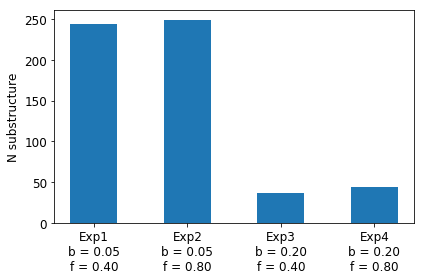

[244, 249, 36, 44]


In [145]:
# Number of substructures

fig = p.figure(figsize=(6,4))
x = arange(4)
y = [len(unique(df1.ext_id)), len(unique(df2.ext_id)), len(unique(df3.ext_id)), len(unique(df4.ext_id))]
p.bar(x, y, width=0.5)
# p.title('Number of substructures')
p.xticks(x, ('Exp1\nb = 0.05\nf = 0.40', 'Exp2\nb = 0.05\nf = 0.80', 'Exp3\nb = 0.20\nf = 0.40', 'Exp4\nb = 0.20\nf = 0.80'))
# p.xticks(x, ('Exp 1', 'Exp 2', 'Exp 3', 'Exp 4'))
p.tick_params(labelsize='large')
p.ylabel('N substructure', size='large')
p.tight_layout()
p.show()
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/exp-n1.png', format='png')
print(y)

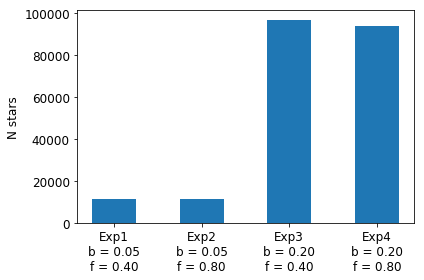

[11332, 11353, 96744, 93836]


In [146]:
# Number of stars in substructures

fig = p.figure(figsize=(6,4))
x = arange(4)
y = [len(df1), len(df2), len(df3), len(df4)]
p.bar(x, y, width=0.5)
# p.title('Number of substructures')
p.xticks(x, ('Exp1\nb = 0.05\nf = 0.40', 'Exp2\nb = 0.05\nf = 0.80', 'Exp3\nb = 0.20\nf = 0.40', 'Exp4\nb = 0.20\nf = 0.80'))
p.tick_params(labelsize='large')
p.ylabel('N stars', size='large')
p.tight_layout()
p.show()
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/exp-n2.png', format='png')
print(y)

/net/baade/data/users/jovan/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


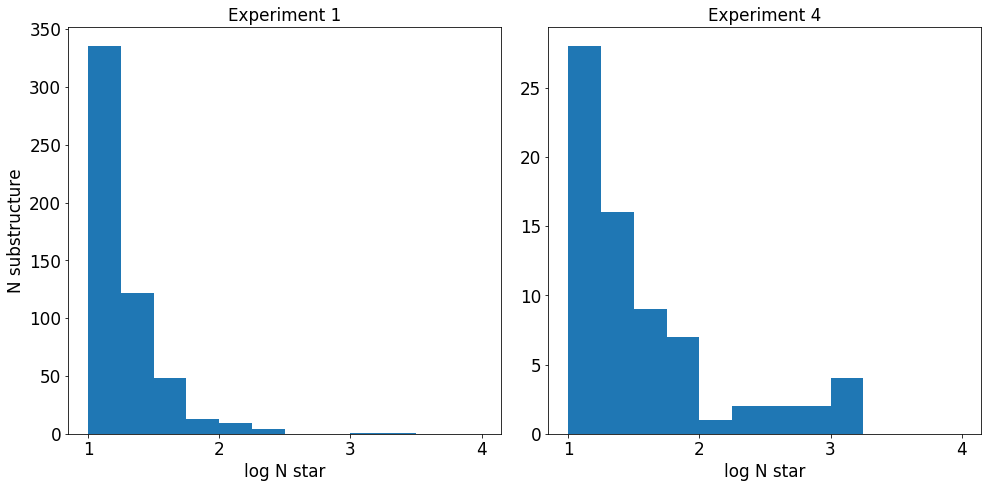

In [42]:
# Size of substructure in terms of the number of particles

fig = p.figure(figsize=(14,7))
# fig.suptitle('Size of substructure in terms of the number of particles')
gs = p.GridSpec(ncols=2, nrows=1)
df_all = [df7, df8] #df1, df2, df3, df4, df5, df6]
title = ['Experiment 1', 'Experiment 4'] #'Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4', 'Experiment 5', 'Experiment 6']
fig.add_subplot(gs[0]), p.ylabel('N substructure', fontsize='large')

for j in [0,1]:
    df = df_all[j]
    fig.add_subplot(gs[j])
    npar = arange(len(unique(df.ext_id)))
    for i in range(len(npar)):
        npar[i] = len(df[df.ext_id==i])
    p.hist(log10(npar), bins=arange(1,4.25,0.25))
    p.xticks(arange(1,5,1), (arange(1,5,1)))
    p.xlabel('log N star', fontsize='large')
    p.tick_params(labelsize='large')
    p.title(title[j], fontsize='large')

gs.tight_layout(fig)
p.show(fig)
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/exp-nstar-bound.png', format='png')

In [47]:
df_all = [df1, df2, df3, df4]
for j in [0,1]:
    df = df_all[j]
    fig.add_subplot(gs[j])
    npar = arange(len(unique(df.ext_id)))
    for i in range(len(npar)):
        npar[i] = len(df[df.ext_id==i])
    print(sort(npar))

[  10   10   10   10   10   10   10   10   10   10   10   10   10   10   10
   10   10   10   10   11   11   11   11   11   11   11   11   11   11   11
   11   11   11   12   12   12   12   12   12   12   12   12   12   12   12
   12   12   12   12   12   13   13   13   13   13   13   13   13   13   13
   14   14   14   14   14   14   14   14   14   14   15   15   15   15   15
   15   15   15   16   16   16   16   16   16   16   16   17   17   17   17
   17   17   17   17   18   18   18   18   18   18   18   19   19   19   19
   19   19   19   20   20   20   20   20   20   20   20   20   20   20   21
   21   21   21   21   22   22   22   22   22   22   22   23   23   23   23
   24   24   24   24   24   25   25   25   26   26   26   26   27   27   27
   27   27   27   27   27   28   28   28   28   28   29   29   29   30   30
   30   30   30   31   31   32   32   32   33   33   33   34   35   35   36
   37   37   37   37   37   38   38   39   39   39   39   40   40   40   41
   42   43  

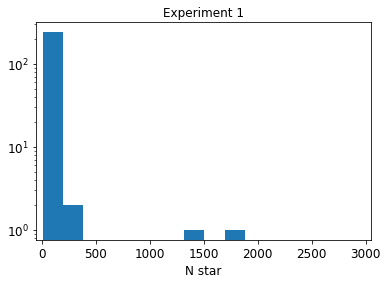

In [116]:
for j in [0]:
    df = df_all[j]
    fig.add_subplot(gs[j])
    npar = arange(len(unique(df.ext_id)))
    for i in range(len(npar)):
        npar[i] = len(df[df.ext_id==i])
    p.hist(npar)
    p.yscale('log')
    p.xlim(-50,3050)
    p.xlabel('N star', fontsize='large')
    p.tick_params(labelsize='large')
    p.title(title[j], fontsize='large')
    p.show()

## Principal Component Analysis

eigenvalue 1 = 0.0490833989383 
eigenvalue 2 = 1.28402771217 

principal axis 1 = 0.922052610499 
principal axis 2 = -1.08453681342

Physical size of the system = 0.642482751846

The eigenvector that has the biggest eigenvalues is the main principal axis (blue line)


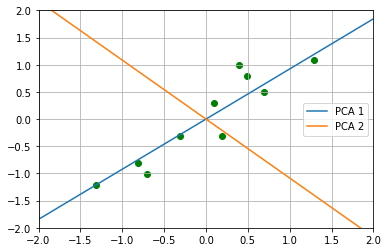

In [86]:
# My data
x=[2.5, 0.5, 2.2, 1.9, 3.1, 2.3, 2, 1, 1.5, 1.1]
y=[2.4, 0.7, 2.9, 2.2, 3.0, 2.7, 1.6, 1.1, 1.6, 0.9]

# My data substracted by mean
x2 = x-mean(x)
y2 = y-mean(y)
    
# The convariance
cxx = sum(x2*x2)/(len(x)-1)
cxy = sum(x2*y2)/(len(x)-1)
cyx = sum(y2*x2)/(len(x)-1)
cyy = sum(y2*y2)/(len(x)-1)

# Put covariance in matrix
cov = [[cxx, cxy], [cyx, cyy]]

# Calculate eigenvalues and eigenvectors
eig = linalg.eig(cov)
e1 = eig[0][0]         #eigenvalue
e2 = eig[0][1]
vy1 = eig[1][0][0]      #eigenvector
vx1 = eig[1][1][0]
vy2 = eig[1][0][1]
vx2 = eig[1][1][1]

# An easier way to do that....
w, v = linalg.eig(cov)

print('eigenvalue 1 =', e1, '\neigenvalue 2 =', e2, '\n\nprincipal axis 1 =', vy2/vx2, '\nprincipal axis 2 =', vy1/vx1)

# The size of the system
size = sqrt(e1**2+e2**2)/2
print('\nPhysical size of the system =', size)
print('\nThe eigenvector that has the biggest eigenvalues is the main principal axis (blue line)')

# Plot of the normalised data with eigenvectors of the covariance matrix
p.scatter(x2, y2, c='green') #adjusted data
p.plot([-2,2], [-2*(vy2/vx2), 2*(vy2/vx2)], label='PCA 1')
p.plot([-2,2], [-2*(vy1/vx1), 2*(vy1/vx1)], label='PCA 2')
p.xlim(-2,2), p.ylim(-2,2)
p.legend()
p.grid()
p.show()

In [87]:
sqrt(e1), sqrt(e2)

(0.22154773512344322, 1.1331494659455936)

In [83]:
from sklearn.decomposition import PCA
pca = PCA(n_components=2, svd_solver='full')

data = array([sort(x), sort(y)]).T
pca.fit(data)
sort(sqrt(pca.explained_variance_))

array([ 0.15365037,  1.14433504])

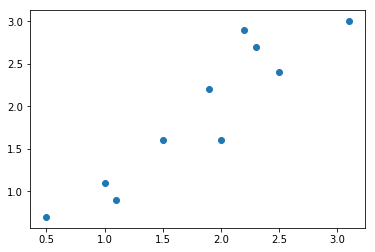

In [11]:
p.scatter(x, y)
p.show()

In [ ]:
df7 = '/net/virgo01/data/users/virgini/rockstar/RC3/output/b20-f80-n10-t0-particles'

In [13]:
# Physical size of substructure

# Make a file to store information
output = '/net/virgo01/data/users/virgini/rockstar/RC3/output/exp-covariance-bound'
with open(output, 'w') as f:
    writer = csv.writer(f, delimiter=' ', lineterminator='\n')
    writer.writerow(['#exp', 'subs', 'n', 'r1', 'r2', 'r3', 'physize', 'sigma'])
    f.close()

n_exp = [1,4]    

df_exp = [df7, df8] #df1, df2, df3, df4, df5, df6]
for k in range(2): #for each experiment,
    df = df_exp[k]
    for i in tqdm(range(len(unique(df.ext_id))), desc='Loading...'): #for each substructure,
        n = len(df[df.ext_id==i])
        # My data
        x, y, z = df.x[df.ext_id==i]*1000, df.y[df.ext_id==i]*1000, df.z[df.ext_id==i]*1000
        vx, vy, vz = df.vx[df.ext_id==i], df.vy[df.ext_id==i], df.vz[df.ext_id==i]
        # My data subtracted by mean
        x2, y2, z2 = x-mean(x), y-mean(y), z-mean(z)
        vx2, vy2, vz2 = vx-mean(vx), vy-mean(vy), vz-mean(vz)
        lensub = len(x)
        # The convariance
        cxx, cyy, czz = sum(x2*x2)/(lensub-1), sum(y2*y2)/(lensub-1), sum(z2*z2)/(lensub-1)
        cxy, cxz, cyz = sum(x2*y2)/(lensub-1), sum(x2*z2)/(lensub-1), sum(y2*z2)/(lensub-1)
        cvxx, cvyy, cvzz = sum(vx2*vx2)/(lensub-1), sum(vy2*vy2)/(lensub-1), sum(vz2*vz2)/(lensub-1)
        cvxy, cvxz, cvyz = sum(vx2*vy2)/(lensub-1), sum(vx2*vz2)/(lensub-1), sum(vy2*vz2)/(lensub-1)
        # Put covariance in matrix
        cov_r = [[cxx, cxy, cxz], [cxy, cyy, cyz], [cxz, cyz, czz]]
        cov_v = [[cvxx, cvxy, cvxz], [cvxy, cvyy, cvyz], [cvxz, cvyz, cvzz]]
        # Calculate eigenvalues and eigenvectors
        er, vr = linalg.eig(cov_r) #eigenvalues w (3), eigenvectors v (3x3)
        ev, vv = linalg.eig(cov_v)
        er_sort = sort(er)
#         ev_sort = sort(ev)
        
        # The size of the system
        size = sqrt((er[0]+er[1]+er[2])/3)
        vel  = sqrt((ev[0]+ev[1]+ev[2])/3)

        vel = sqrt(vx**2 + vy**2 + vz**2)
        sigma = vel.std()
        
        # Store data into a file
        with open(output, 'a') as f:
            writer = csv.writer(f, delimiter=' ', lineterminator='\n')
            writer.writerow([n_exp[k], i, n, sqrt(er_sort[0]), sqrt(er_sort[1]), sqrt(er_sort[2]), size, sigma])
            f.close()

Loading...: 100%|██████████| 72/72 [00:04<00:00, 15.84it/s]


In [16]:
# Read the data
output = '/net/virgo01/data/users/virgini/rockstar/RC3/output/exp-covariance-bound'
header = ['exp', 'subs', 'n', 'r1', 'r2', 'r3', 'physize', 'sigma']
dc = pd.read_csv(output, sep=' ', comment='#', names=header) #data from covariance matrix
# dc1, dc2, dc3, dc4, dc5, dc6 = dc[dc.exp==1], dc[dc.exp==2], dc[dc.exp==3], dc[dc.exp==4], dc[dc.exp==5], dc[dc.exp==6]
dc1, dc4 = dc[dc.exp==1], dc[dc.exp==4]

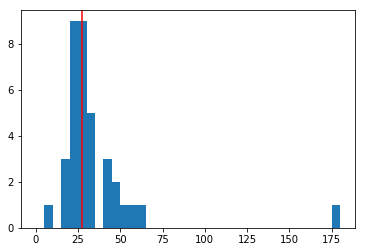

27.402517316400001

In [77]:
p.hist(dc3.physize, bins=bins)
p.axvline(median(dc3.physize), c='red')
p.show()
median(dc3.physize)

/net/baade/data/users/jovan/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


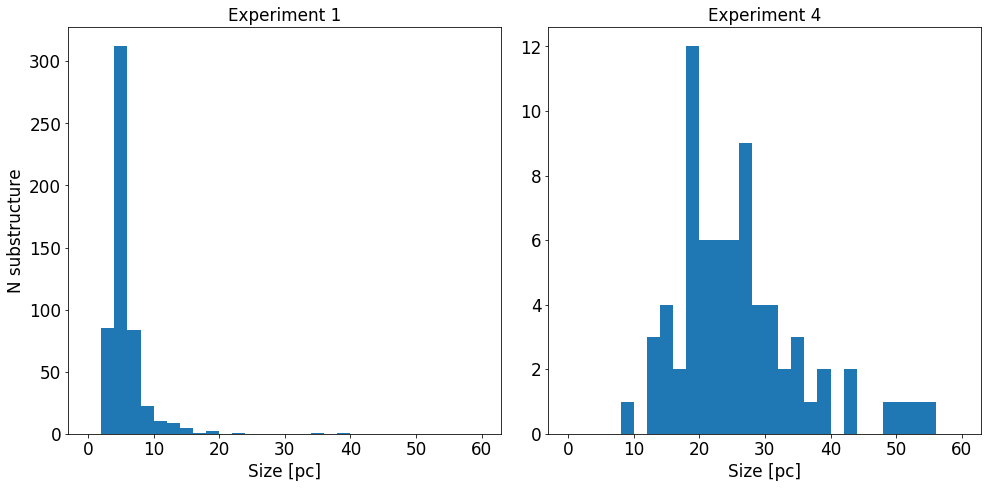

In [43]:
# Physical size of the substructure based on princial axes
fig = p.figure(figsize=(14,7))
gs = p.GridSpec(ncols=2, nrows=1)
dc_all = [dc1, dc4] #[dc1, dc2, dc3, dc4, dc5, dc6]
text = ['b = 0.05\nf  = 0.40', 'b = 0.05\nf  = 0.80', 'b = 0.20\nf  = 0.40', 'b = 0.20\nf  = 0.80']
title = ['Experiment 1', 'Experiment 4'] #'Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4', 'Experiment 5', 'Experiment 6']
fig.add_subplot(gs[0]), p.ylabel('N substructure', fontsize='large')
for i in [0,1]:
    dc = dc_all[i]
    fig.add_subplot(gs[i])
    p.hist(dc.physize, bins=arange(0,62,2))
    p.xlabel('Size [pc]', fontsize='large')
    p.tick_params(labelsize='large')
    p.title(title[i], fontsize='large')
gs.tight_layout(fig)
p.show(fig)
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/exp-physize-bound.png', format='png')

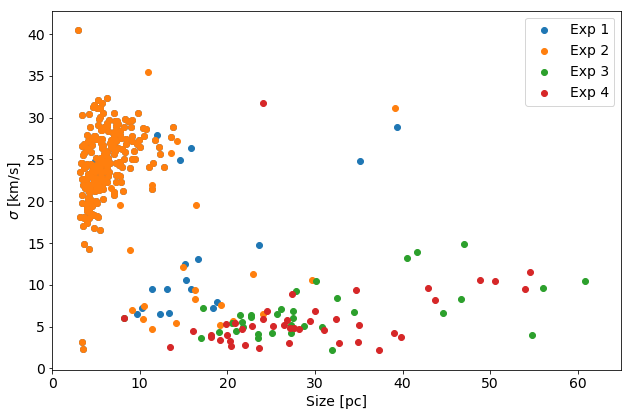

In [136]:
fig = p.figure(figsize=(9,6))
p.scatter(dc1.physize, dc1.vel, label='Exp 1')
p.scatter(dc2.physize, dc2.vel, label='Exp 2')
p.scatter(dc3.physize, dc3.vel, label='Exp 3')
p.scatter(dc4.physize, dc4.vel, label='Exp 4')
p.xlabel('Size [pc]')
p.ylabel(r'$\sigma$ [km/s]')
p.xlim(0,65)
p.legend()
fig.tight_layout()
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/exp-physize-dispersion.png', format='png')
p.show()

/net/baade/data/users/jovan/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


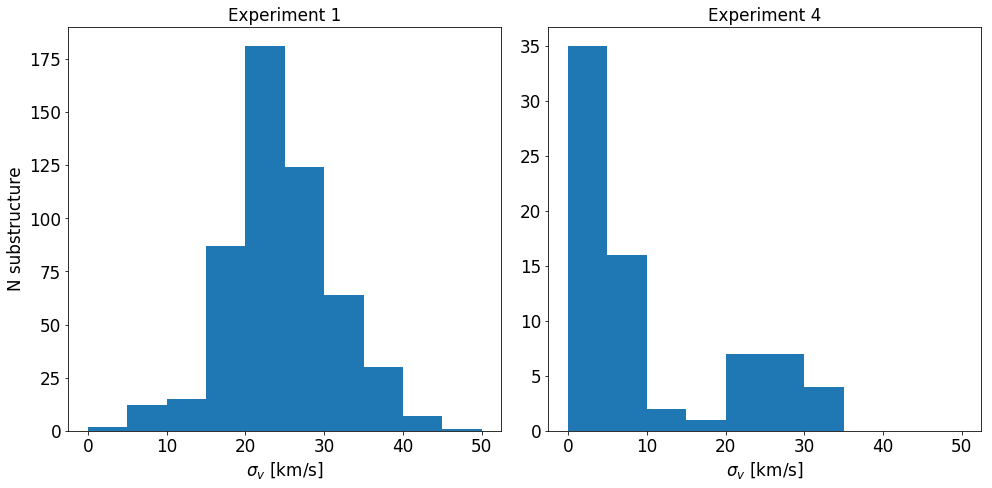

In [45]:
# Velocity (dispersion?) along the principal axes
fig = p.figure(figsize=(14,7))
gs = p.GridSpec(ncols=2, nrows=1)
dc_all = [dc1, dc4] #[dc1, dc2, dc3, dc4, dc5, dc6]
title = ['Experiment 1', 'Experiment 4'] #'Experiment 1', 'Experiment 2', 'Experiment 3', 'Experiment 4', 'Experiment 5', 'Experiment 6']
bins = arange(0,55,5)
fig.add_subplot(gs[0]), p.ylabel('N substructure', fontsize='large')
for i in [0,1]:
    dc = dc_all[i]
    fig.add_subplot(gs[i])
    p.hist(dc.sigma, bins=bins)
    p.xlabel('$\sigma_v$ [km/s]', fontsize='large')
    p.tick_params(labelsize='large')
    p.xticks((0, 10, 20, 30, 40, 50))
    p.title(title[i], fontsize='large')
gs.tight_layout(fig)
p.show(fig)
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/exp-vel-bound.png', format='png')

/net/baade/data/users/jovan/miniconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


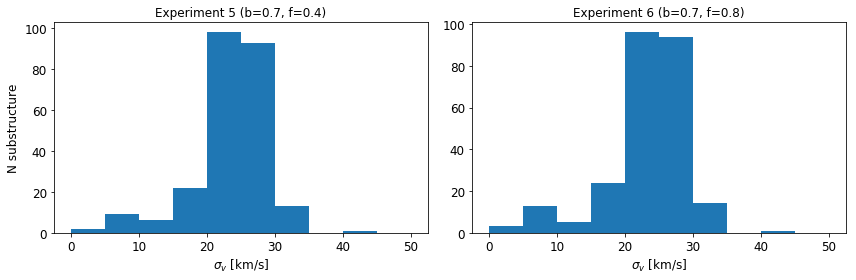

In [37]:
# Velocity (dispersion?) along the principal axes
fig = p.figure(figsize=(12,4))
gs = p.GridSpec(ncols=2, nrows=1)
dc_all = [dc1, dc2, dc3, dc4]
bins = arange(0,55,5)
title = ['Experiment 5 (b=0.7, f=0.4)', 'Experiment 6 (b=0.7, f=0.8)']
fig.add_subplot(gs[0]), p.ylabel('N substructure', fontsize='large')
for i in [0,1]:
    dc = dc_all[i]
    fig.add_subplot(gs[i])
    p.hist(dc.vel, bins=bins)
    p.xlabel('$\sigma_v$ [km/s]', fontsize='large')
    p.tick_params(labelsize='large')
    p.title(title[i], fontsize='large')
gs.tight_layout(fig)
p.show(fig)
fig.savefig('/net/virgo01/data/users/virgini/rockstar/RC3/output/exp-vel-56.png', format='png')